**Business Understanding**

Thailand Happiness

find cluster

**Data Understanding**

Superstore file in csv format

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
df1=pd.read_csv('Thailand Happiness.csv.csv')

**Data Preparation**

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           9 non-null      object 
 1   Happiness Rank (158)           9 non-null      float64
 2   Happiness Score(10)            9 non-null      float64
 3   Economy (GDP per Capita)       9 non-null      float64
 4   Family                         9 non-null      float64
 5   Health (Life Expectancy)       9 non-null      float64
 6   Freedom                        9 non-null      float64
 7   Trust (Government Corruption)  9 non-null      float64
 8   Generosity                     9 non-null      float64
 9   Dystopia Residual              9 non-null      float64
dtypes: float64(9), object(1)
memory usage: 928.0+ bytes


In [4]:
df1.tail()

,Year,Happiness Rank (158),Happiness Score(10),Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
5,2020,54.00,5.9990,1.007000,1.348000,0.794000,0.609,0.032000,0.377000,1.832000
6,2021,54.00,5.9850,1.107000,0.957000,0.596000,0.611,0.028000,0.375000,2.309000
7,2022,61.00,5.8910,1.535000,1.096000,0.697000,0.617,0.000000,0.321000,1.600000
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,average,45.75,6.1635,1.112375,1.245375,0.707125,0.583,0.029375,0.441375,2.329074


In [5]:
df1.drop(9,inplace=True)

In [6]:
df1.drop(8,inplace=True)

In [7]:
df1.tail()

,Year,Happiness Rank (158),Happiness Score(10),Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
3,2018,46.0,6.072,1.016,1.417,0.707,0.637,0.029,0.364,2.738
4,2019,52.0,6.008,1.050,1.409,0.828,0.557,0.028,0.359,3.215
5,2020,54.0,5.999,1.007,1.348,0.794,0.609,0.032,0.377,1.832
6,2021,54.0,5.985,1.107,0.957,0.596,0.611,0.028,0.375,2.309
7,2022,61.0,5.891,1.535,1.096,0.697,0.617,0.000,0.321,1.600


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           8 non-null      object 
 1   Happiness Rank (158)           8 non-null      float64
 2   Happiness Score(10)            8 non-null      float64
 3   Economy (GDP per Capita)       8 non-null      float64
 4   Family                         8 non-null      float64
 5   Health (Life Expectancy)       8 non-null      float64
 6   Freedom                        8 non-null      float64
 7   Trust (Government Corruption)  8 non-null      float64
 8   Generosity                     8 non-null      float64
 9   Dystopia Residual              8 non-null      float64
dtypes: float64(9), object(1)
memory usage: 768.0+ bytes


In [9]:
df1.Date=pd.to_datetime(df1.Year,format="%Y")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16532\1309801108.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df1.Date=pd.to_datetime(df1.Year,format="%Y")


In [10]:
df1.set_index('Year',inplace=True)


In [11]:
df1.head()

,Happiness Rank (158),Happiness Score(10),Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Year,,,,,,,,,
2015,34.0,6.455,0.967,1.265,0.739,0.557,0.032,0.576,2.319
2016,33.0,6.474,1.089,1.045,0.649,0.496,0.028,0.587,2.580
2017,32.0,6.424,1.128,1.426,0.647,0.580,0.032,0.572,2.040
2018,46.0,6.072,1.016,1.417,0.707,0.637,0.029,0.364,2.738
2019,52.0,6.008,1.050,1.409,0.828,0.557,0.028,0.359,3.215


<AxesSubplot:xlabel='Year'>

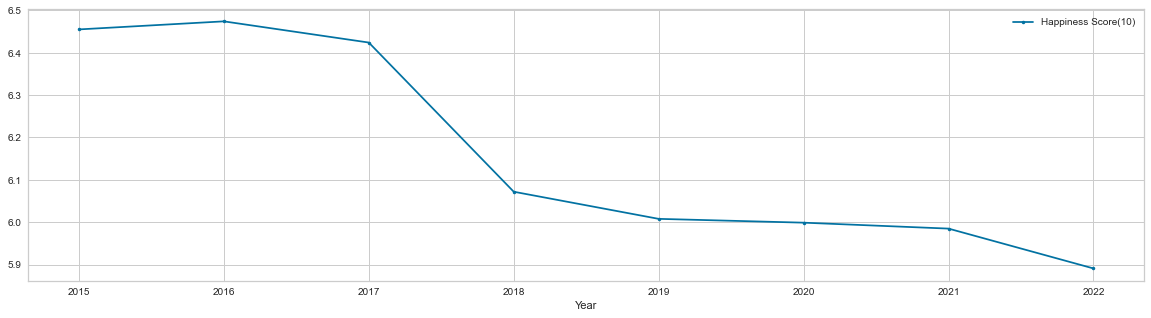

In [12]:
hh=['Happiness Score(10)']
df1[hh].plot(marker='.',figsize=(20,5),grid=True)

<AxesSubplot:xlabel='Year'>

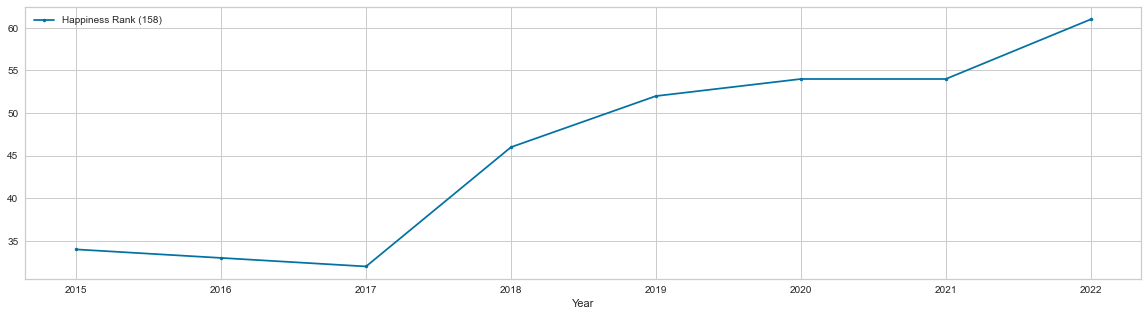

In [13]:
hh=['Happiness Rank (158)']
df1[hh].plot(marker='.',figsize=(20,5),grid=True)

In [14]:
df1.columns

Index(['Happiness Rank (158)', 'Happiness Score(10)',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [15]:
df1=df1.rename(columns={'Happiness Rank (158)':'Happiness_Rank','Happiness Score(10)':'Happiness_Score','Economy (GDP per Capita)':'Economy',
                        'Health (Life Expectancy)':'Health','Trust (Government Corruption)':'Trust','Dystopia Residual':'Dystopia_Residual'})

In [16]:
df1.Happiness_Score.value_counts()

6.455    1
6.474    1
6.424    1
6.072    1
6.008    1
5.999    1
5.985    1
5.891    1
Name: Happiness_Score, dtype: int64

In [17]:
df1.columns

Index(['Happiness_Rank', 'Happiness_Score', 'Economy', 'Family', 'Health',
       'Freedom', 'Trust', 'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [18]:
df1.isnull().sum()

Happiness_Rank       0
Happiness_Score      0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia_Residual    0
dtype: int64

In [19]:
df1.columns

Index(['Happiness_Rank', 'Happiness_Score', 'Economy', 'Family', 'Health',
       'Freedom', 'Trust', 'Generosity', 'Dystopia_Residual'],
      dtype='object')

select data

In [20]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [21]:
df1.columns

Index(['Happiness_Rank', 'Happiness_Score', 'Economy', 'Family', 'Health',
       'Freedom', 'Trust', 'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [22]:
colss=['Happiness_Rank', 'Economy', 'Family', 'Health',
       'Freedom', 'Trust', 'Generosity', 'Dystopia_Residual']

In [23]:
scaler=preprocessing.PowerTransformer(standardize=True)
S1=scaler.fit_transform(df1[colss])
S1[:7].round(4)

array([[-1.109 , -1.5948, -0.0613,  0.4914, -0.7802,  1.0413,  1.2346,
         0.0552],
       [-1.2017,  0.2742, -1.1627, -0.7786, -1.7103, -0.3231,  1.2877,
         0.5748],
       [-1.2942,  0.6295,  1.1223, -0.8093, -0.2686,  1.0413,  1.2145,
        -0.55  ],
       [ 0.0159, -0.6692,  1.046 ,  0.063 ,  1.5645, -0.0496, -0.6564,
         0.8704],
       [ 0.586 , -0.1766,  0.9792,  1.5655, -0.7802, -0.3231, -0.732 ,
         1.6892],
       [ 0.777 , -0.8183,  0.5024,  1.1742,  0.5483,  1.0413, -0.4696,
        -1.0403],
       [ 0.777 ,  0.4486, -1.4745, -1.6303,  0.6129, -0.3231, -0.4975,
         0.0344]])

In [24]:
X2=pd.DataFrame(S1,columns=colss)
X2

,Happiness_Rank,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,-1.109025,-1.594822,-0.061321,0.491382,-0.780153,1.041319,1.234557,0.055191
1,-1.201713,0.274182,-1.162652,-0.778648,-1.710268,-0.323100,1.287723,0.574829
2,-1.294220,0.629473,1.122322,-0.809285,-0.268578,1.041319,1.214515,-0.549952
3,0.015898,-0.669229,1.045990,0.063020,1.564454,-0.049587,-0.656440,0.870437
4,0.585977,-0.176558,0.979223,1.565524,-0.780153,-0.323100,-0.731964,1.689224
5,0.776991,-0.818277,0.502432,1.174216,0.548332,1.041319,-0.469639,-1.040292
6,0.776991,0.448589,-1.474471,-1.630315,0.612868,-0.323100,-0.497508,0.034438
7,1.449101,1.906641,-0.951523,-0.075894,0.813498,-2.105070,-1.381243,-1.633874


In [25]:
def sil_score(X2,from_k=2,to_k=6):
    sils=[]
    for k in range(from_k,to_k+1):
        m=KMeans(n_clusters=k)
        m.fit(X2)
        silhouette_avg=silhouette_score(X2,m.labels_).round(4)
        sils.append([silhouette_avg,k])
        
    return sils

In [26]:
ss=sil_score(X2,2,5)
print(f'score={ss}')

score=[[0.229, 2], [0.2439, 3], [0.151, 4], [0.0901, 5]]


**Modeling**

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer

In [28]:
cols1=['Happiness_Rank']

In [29]:
scaler=preprocessing.PowerTransformer(standardize=True)
S=scaler.fit_transform(df1[cols1])
S[:7].round(4)

array([[-1.109 ],
       [-1.2017],
       [-1.2942],
       [ 0.0159],
       [ 0.586 ],
       [ 0.777 ],
       [ 0.777 ]])

In [30]:
X11=pd.DataFrame(X2,columns=cols1)
X11.head()

,Happiness_Rank
0,-1.109025
1,-1.201713
2,-1.294220
3,0.015898
4,0.585977


In [31]:
model=KMeans(n_clusters=2)

In [32]:
scaler=preprocessing.PowerTransformer(standardize=True)

S=scaler.fit_transform(df1[cols1])
S[:7].round(3)

array([[-1.109],
       [-1.202],
       [-1.294],
       [ 0.016],
       [ 0.586],
       [ 0.777],
       [ 0.777]])

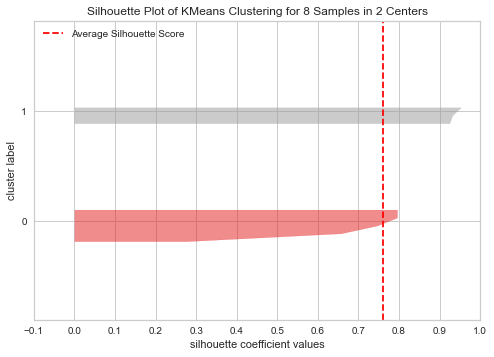

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
visualizer=SilhouetteVisualizer(model)
visualizer.fit(X11)
visualizer.poof()

In [34]:
dx=X11
dx['cluster']=model.labels_
dx

,Happiness_Rank,cluster
0,-1.109025,1
1,-1.201713,1
2,-1.294220,1
3,0.015898,0
4,0.585977,0
5,0.776991,0
6,0.776991,0
7,1.449101,0


In [35]:
df1['cluster']=model.labels_
df1

,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual,cluster
Year,,,,,,,,,,
2015,34.0,6.455,0.967,1.265,0.739,0.557,0.032,0.576,2.319,1
2016,33.0,6.474,1.089,1.045,0.649,0.496,0.028,0.587,2.580,1
2017,32.0,6.424,1.128,1.426,0.647,0.580,0.032,0.572,2.040,1
2018,46.0,6.072,1.016,1.417,0.707,0.637,0.029,0.364,2.738,0
2019,52.0,6.008,1.050,1.409,0.828,0.557,0.028,0.359,3.215,0
2020,54.0,5.999,1.007,1.348,0.794,0.609,0.032,0.377,1.832,0
2021,54.0,5.985,1.107,0.957,0.596,0.611,0.028,0.375,2.309,0
2022,61.0,5.891,1.535,1.096,0.697,0.617,0.000,0.321,1.600,0


**Evalution**

In [36]:
visualizer.silhouette_score_

0.7594352342092237

In [37]:
print('Score -> {:.2f}'.format(visualizer.silhouette_score_))

Score -> 0.76


**Deployment**

สรุปความเเม่นย้ำ